# Airbnb_Price_Prediction

In this project we take data of Airbnb listings in the US and try to predict the price of stay in that listing.
The source of the dataset:
https://www.kaggle.com/stevezhenghp/airbnb-price-prediction#train.csv

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
import warnings
warnings.filterwarnings('ignore')

In [81]:
#loading data
df = pd.read_csv('D:/hotel price prediction/train.csv')

In [82]:
#sanity check
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [83]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

The dataframe columns are in different types of integer, float and string and also have some null values.

In [84]:
df.describe

<bound method NDFrame.describe of              id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,

The dataframe has 74111 rows and 29 columns.

# Checking for Duplicated Columns:

In [85]:
# Checking for duplicates and counting
df.duplicated().sum()

0

# NaN Values:

In [86]:
# How many values are actually missing?
df.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

# Numerical columns:

### bathrooms:

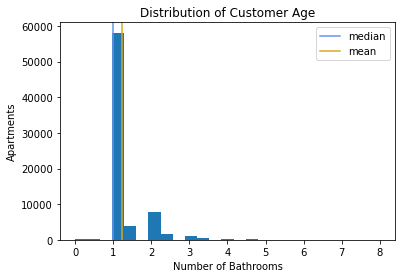

In [87]:
# Let's do a little EDA and visualize the age column to inform our decision
plt.figure()
plt.hist(df['bathrooms'], bins=25)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Apartments')
plt.title('Distribution of Customer Age')
plt.axvline(df['bathrooms'].median(), label='median', color='cornflowerblue')
plt.axvline(df['bathrooms'].mean(), label='mean', color='goldenrod')
plt.legend()
plt.show()

In [88]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())

In [89]:
#check
df['bathrooms'].isna().sum()

0

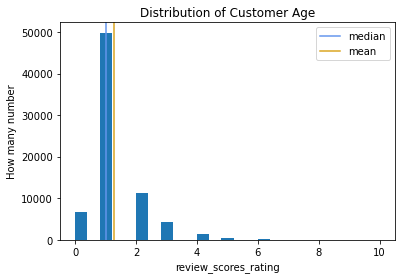

In [90]:
# Let's do a little EDA and visualize the age column to inform our decision
plt.figure()
plt.hist(df['bedrooms'], bins=25)
plt.xlabel('review_scores_rating')
plt.ylabel('How many number')
plt.title('Distribution of Customer Age')
plt.axvline(df['bedrooms'].median(), label='median', color='cornflowerblue')
plt.axvline(df['bedrooms'].mean(), label='mean', color='goldenrod')
plt.legend()
plt.show()

In [91]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())

In [92]:
#check
df['review_scores_rating'].isna().sum()

0

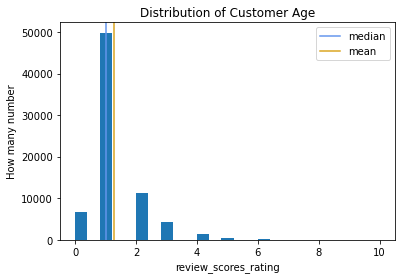

In [93]:
# Let's do a little EDA and visualize the age column to inform our decision
plt.figure()
plt.hist(df['bedrooms'], bins=25)
plt.xlabel('review_scores_rating')
plt.ylabel('How many number')
plt.title('Distribution of Customer Age')
plt.axvline(df['bedrooms'].median(), label='median', color='cornflowerblue')
plt.axvline(df['bedrooms'].mean(), label='mean', color='goldenrod')
plt.legend()
plt.show()

In [94]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

In [95]:
df['beds'] = df['beds'].fillna(df['beds'].mean())

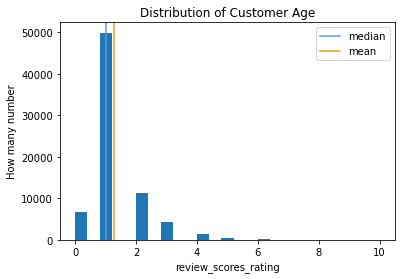

In [96]:
# Let's do a little EDA and visualize the age column to inform our decision
plt.figure()
plt.hist(df['bedrooms'], bins=25)
plt.xlabel('review_scores_rating')
plt.ylabel('How many number')
plt.title('Distribution of Customer Age')
plt.axvline(df['bedrooms'].median(), label='median', color='cornflowerblue')
plt.axvline(df['bedrooms'].mean(), label='mean', color='goldenrod')
plt.legend()
plt.show()

In [97]:
df.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating          0
thumbnail_url              8216
zipcode                     966
bedrooms                      0
beds                          0
dtype: int64

In [98]:
df['host_response_rate'].unique()

array([nan, '100%', '71%', '68%', '67%', '83%', '50%', '90%', '86%',
       '92%', '82%', '80%', '89%', '93%', '99%', '0%', '88%', '96%',
       '70%', '94%', '91%', '25%', '95%', '98%', '62%', '29%', '33%',
       '81%', '63%', '38%', '60%', '79%', '78%', '75%', '65%', '97%',
       '87%', '40%', '54%', '53%', '58%', '76%', '30%', '64%', '17%',
       '20%', '77%', '73%', '41%', '59%', '57%', '85%', '56%', '42%',
       '44%', '35%', '14%', '74%', '27%', '10%', '84%', '6%', '72%',
       '36%', '55%', '43%', '13%', '39%', '46%', '26%', '61%', '52%',
       '23%', '22%', '69%', '66%', '15%', '11%', '31%', '21%', '47%'],
      dtype=object)

In [99]:
df['host_response_rate'] = df['host_response_rate'].fillna('100%')

In [100]:

df['host_response_rate'] = df['host_response_rate'].apply(lambda x: re.sub(r'%','',x))

In [101]:
df['host_response_rate'] = df['host_response_rate'].astype(int)

In [102]:
df.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate            0
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating          0
thumbnail_url              8216
zipcode                     966
bedrooms                      0
beds                          0
dtype: int64

In [103]:
df['host_has_profile_pic'].value_counts()

t    73697
f      226
Name: host_has_profile_pic, dtype: int64

In [104]:
df['host_has_profile_pic']=df['host_has_profile_pic'].fillna('t')

In [105]:
df['host_identity_verified'].value_counts()

t    49748
f    24175
Name: host_identity_verified, dtype: int64

In [106]:
df['host_identity_verified']=df['host_identity_verified'].fillna('t')

In [107]:
df['host_since'].value_counts()

2015-03-30    246
2014-02-14    173
2015-05-18     83
2016-09-16     83
2015-07-06     82
             ... 
2009-04-08      1
2009-11-22      1
2010-02-28      1
2009-05-11      1
2009-08-23      1
Name: host_since, Length: 3087, dtype: int64

In [108]:
df = df.drop(columns=['first_review','last_review','zipcode','thumbnail_url','host_since','id','neighbourhood'],axis=0)

In [109]:
df.isna().sum()

log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
latitude                  0
longitude                 0
name                      0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   amenities               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               74111 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  description             74111 non-null  object 
 11  host_has_profile_pic    74111 non-null  object 
 12  host_identity_verified  74111 non-null  object 
 13  host_response_rate      74111 non-null  int32  
 14  instant_bookable        74111 non-null

# Categorial columns:

In [111]:
# Make a new dataframe of only the categorical variables
categorical_df = df.select_dtypes('object').copy()

# Check
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   property_type           74111 non-null  object
 1   room_type               74111 non-null  object
 2   amenities               74111 non-null  object
 3   bed_type                74111 non-null  object
 4   cancellation_policy     74111 non-null  object
 5   city                    74111 non-null  object
 6   description             74111 non-null  object
 7   host_has_profile_pic    74111 non-null  object
 8   host_identity_verified  74111 non-null  object
 9   instant_bookable        74111 non-null  object
 10  name                    74111 non-null  object
dtypes: object(11)
memory usage: 6.2+ MB


In [112]:
categorical_df=categorical_df.drop(columns=['amenities','description'], axis=0)

## amenities column

In [113]:
df['amenities'][4]

'{TV,Internet,"Wireless Internet","Air conditioning",Kitchen,"Elevator in building",Heating,"Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo}'

In [114]:
df['TV'] = df['amenities'].map(lambda x: 1 if 'TV' in x else 0)
df['Cable TV']=df['amenities'].map(lambda x: 1 if 'Cable TV' in x else 0)
df['Wireless Internet']=df['amenities'].map(lambda x: 1 if 'Wireless Internet' in x else 0)
df['Air conditioning']=df['amenities'].map(lambda x: 1 if 'Air conditioning' in x else 0)
df['Heating']=df['amenities'].map(lambda x: 1 if 'Heating' in x else 0)
df['Kitchen']=df['amenities'].map(lambda x: 1 if 'Kitchen' in x else 0)
df['Washer']=df['amenities'].map(lambda x: 1 if 'Washer' in x else 0)
df['Dryer']=df['amenities'].map(lambda x: 1 if 'Dryer' in x else 0)
df['Smoke detector']=df['amenities'].map(lambda x: 1 if 'Smoke detector' in x else 0)
df['Iron']=df['amenities'].map(lambda x: 1 if 'Iron' in x else 0)
df['Hair dryer']=df['amenities'].map(lambda x: 1 if 'Hair dryer' in x else 0)


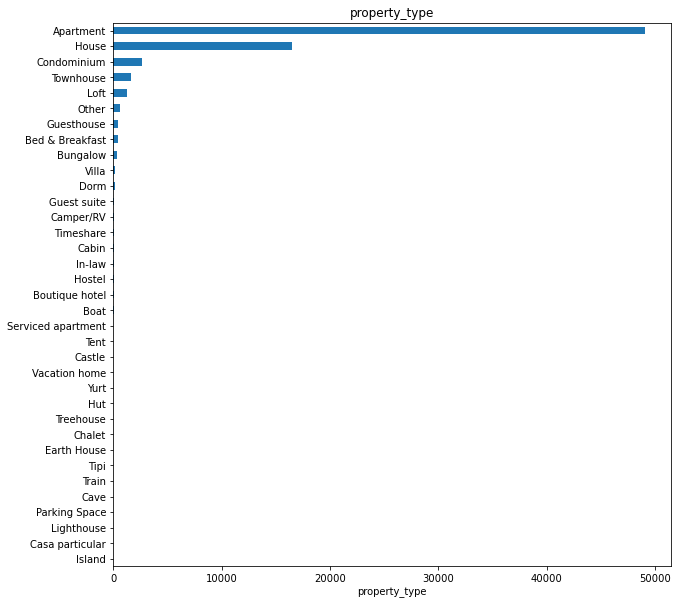

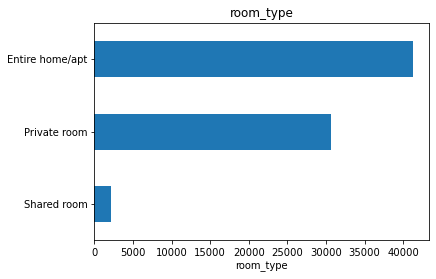

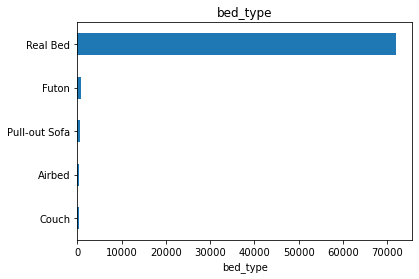

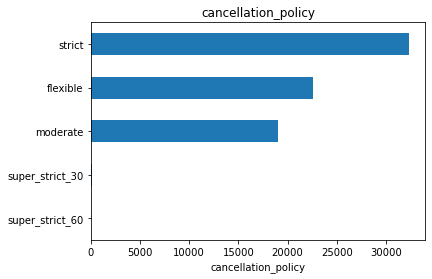

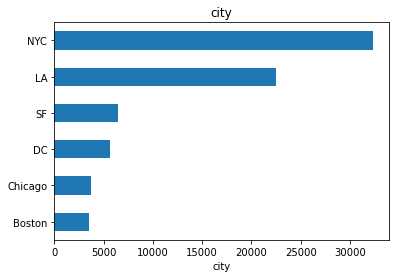

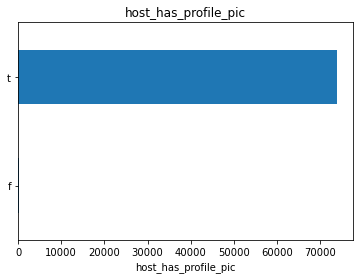

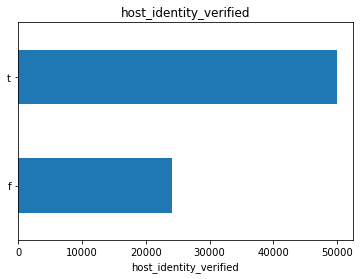

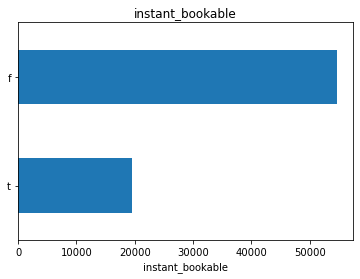

In [115]:
plt.figure(figsize=(10,10))
# Iterate over the columns
for column in categorical_df.columns[:-1]:
    
    # Visualize a summary of each
    categorical_df[column].value_counts().sort_values().plot(kind='barh')
    plt.xlabel(column)
    plt.title(column)
    plt.show()

In [116]:
# Can use the np.where to convert
df['instant_bookable'] = np.where(df['instant_bookable'] == 't', 1, 0)
df['host_identity_verified'] = np.where(df['host_identity_verified'] == 't', 1, 0)
df['host_has_profil_pic'] = np.where(df['host_has_profile_pic'] == 't', 1, 0)

In [117]:
df['amenities'][0]

'{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}'

In [118]:
df.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Wireless Internet,Air conditioning,Heating,Kitchen,Washer,Dryer,Smoke detector,Iron,Hair dryer,host_has_profil_pic
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,1,1,1,1,0,0,0,1,1,1
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,1,1,1,1,1,1,1,1,1,1
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,1,1,1,1,0,0,1,1,1,1
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,1,0,1,1,1,1,1,0,0,1
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,1,1,1,1,0,0,1,0,0,1


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   amenities               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               74111 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  description             74111 non-null  object 
 11  host_has_profile_pic    74111 non-null  object 
 12  host_identity_verified  74111 non-null  int32  
 13  host_response_rate      74111 non-null  int32  
 14  instant_bookable        74111 non-null

In [120]:
df=df.drop(columns=['amenities','description'], axis=0)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   accommodates            74111 non-null  int64  
 4   bathrooms               74111 non-null  float64
 5   bed_type                74111 non-null  object 
 6   cancellation_policy     74111 non-null  object 
 7   cleaning_fee            74111 non-null  bool   
 8   city                    74111 non-null  object 
 9   host_has_profile_pic    74111 non-null  object 
 10  host_identity_verified  74111 non-null  int32  
 11  host_response_rate      74111 non-null  int32  
 12  instant_bookable        74111 non-null  int32  
 13  latitude                74111 non-null  float64
 14  longitude               74111 non-null

In [123]:
categorical_df = df.select_dtypes('object').copy()

# Check
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   property_type         74111 non-null  object
 1   room_type             74111 non-null  object
 2   bed_type              74111 non-null  object
 3   cancellation_policy   74111 non-null  object
 4   city                  74111 non-null  object
 5   host_has_profile_pic  74111 non-null  object
 6   name                  74111 non-null  object
dtypes: object(7)
memory usage: 4.0+ MB
